In [2]:
#mempersiapkan data set
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [3]:
#membuar dataset dengan pusat (0,0) dan (5.3)
X,y = make_blobs(n_samples=30, centers=[(0,0),(5,3)],random_state=86)

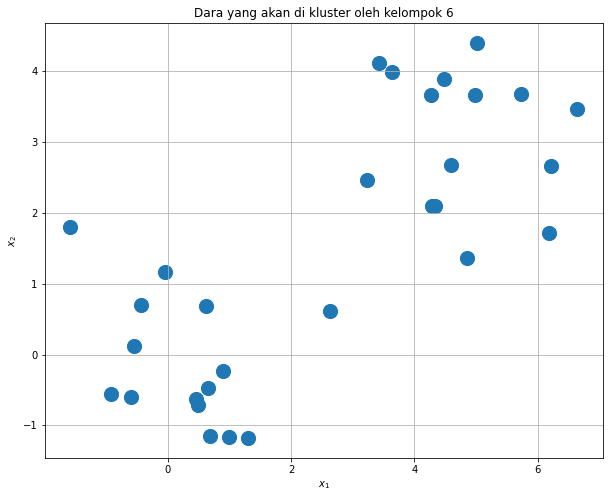

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], s = 200, marker = "o", alpha = 1)
plt.title("Data yang akan di kluster oleh kelompok 6")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)


In [5]:
#klusterisasi
from sklearn.cluster import KMeans
#inisialisasi model K-mean dengan K=2
kmeans = KMeans(n_clusters = 2, random_state=123)
#melatih Data
kmeans.fit(X)

KMeans(n_clusters=2, random_state=123)

In [6]:
#menapilkan hasil Klasifikasi
#menampilkan pusat cluster
print(kmeans.cluster_centers_)
#menampilkan hasil kluster
print(kmeans.labels_)
#menampilkan jumlah iterasi
print(kmeans.n_iter_)

[[ 0.30821815 -0.10829635]
 [ 4.79372715  3.05802975]]
[1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1]
2


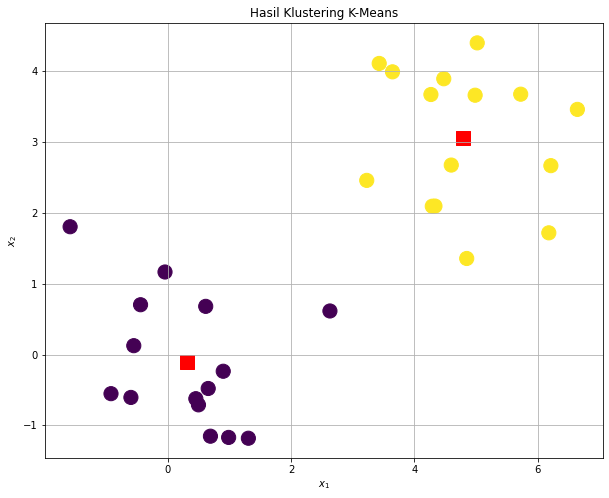

In [12]:
plt.figure(figsize=(10, 8))
output = plt.scatter(X[:,0], X[:,1], s = 200, c = kmeans.labels_, marker = "o", alpha = 1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1, marker="s");
plt.title("Hasil Klustering K-Means")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.show()

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [17]:
#Data Preprocessing
#missing values
print("missing value: ")
print(df.isna().sum())
#cek duplikasi data
print("jumlah duplikasi = ",df.duplicated().sum())

missing value: 
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
jumlah duplikasi =  0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv('Mall_Customers.csv')
#menghapus feature costumerID
df.drop('CustomerID', axis = 1, inplace = True)
#rendame kolom
df.rename(columns = {'Annual Income (k$)':'Annual Income'}, inplace = True)
df.rename(columns = {'Spending Score (1-100)':'Spending Score'}, inplace = True)

#merubah nilai male dan female enjadi numeric
from sklearn.preprocessing import StandardScaler, LabelEncoder
labeler = LabelEncoder()
df['Genre'] = labeler.fit_transform(df['Genre'])
df

,Genre,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


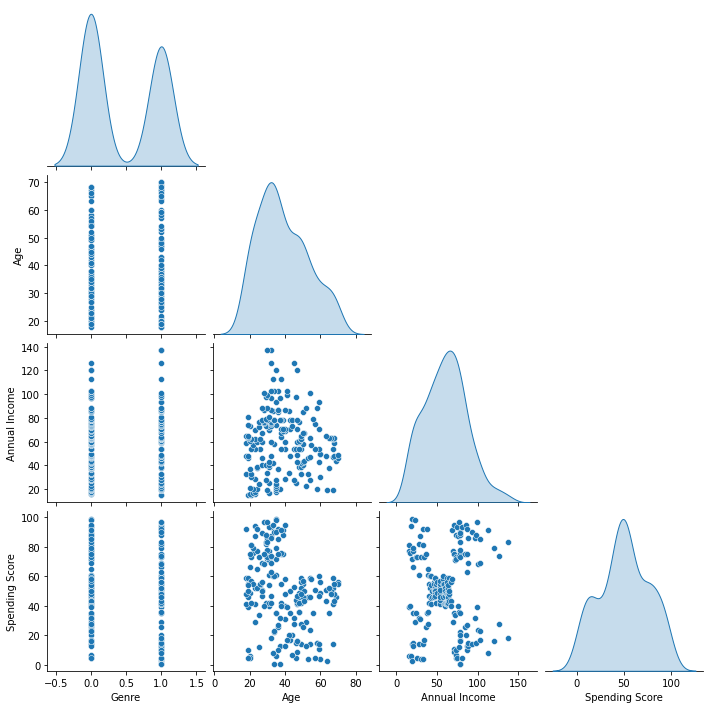

In [9]:
sns.pairplot(df,corner=True,diag_kind="kde")
plt.show()

In [10]:
df.describe()

,Genre,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [11]:
#Scaling data
scaler = StandardScaler()
#Scaling keculai Gender
Genre = df['Genre']
df.drop('Genre', axis = 1)
#proses scaling
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df['Genre'] = Genre
df.head(5)

,Genre,Age,Annual Income,Spending Score
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

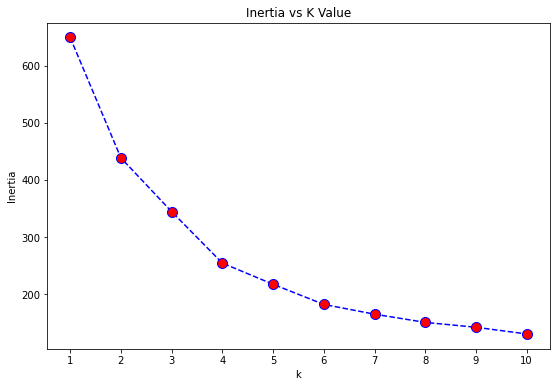

In [12]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize = (9,6))
plt.plot(range(1,11), inertia_list, color = 'blue',
        linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'red', markersize = 10)
plt.title('Inertia vs K Value')
plt.xticks(range(1,11, 1))
plt.xlabel('k')
plt.ylabel('Inertia')

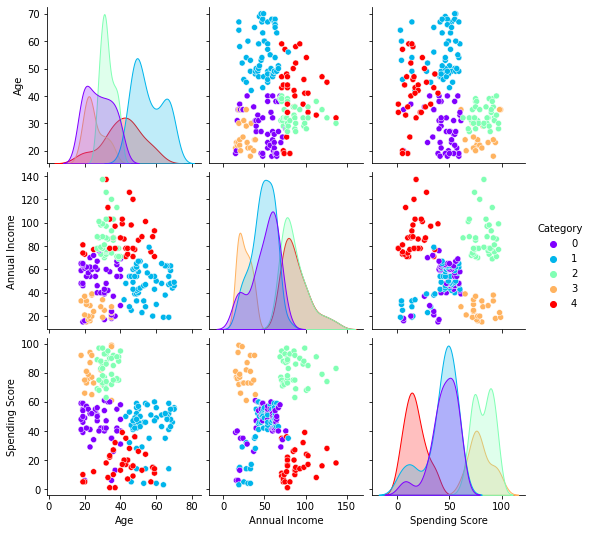

In [15]:
km = KMeans(n_clusters =5).fit(df)
#Membaca kembali original data ke variable lain
#karena dara untuk klustering telah diubah2
df_ori = pd.read_csv('Mall_Customers.csv')
df_ori.drop('CustomerID', axis = 1, inplace = True)
df_ori.rename(columns = {'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'}, inplace = True)

#membuat satu kolom category untuk menampung hasil kluster kita
df_ori['Category'] = km.labels_
sns.pairplot(data = df_ori, hue = 'Category', palette = 'rainbow')

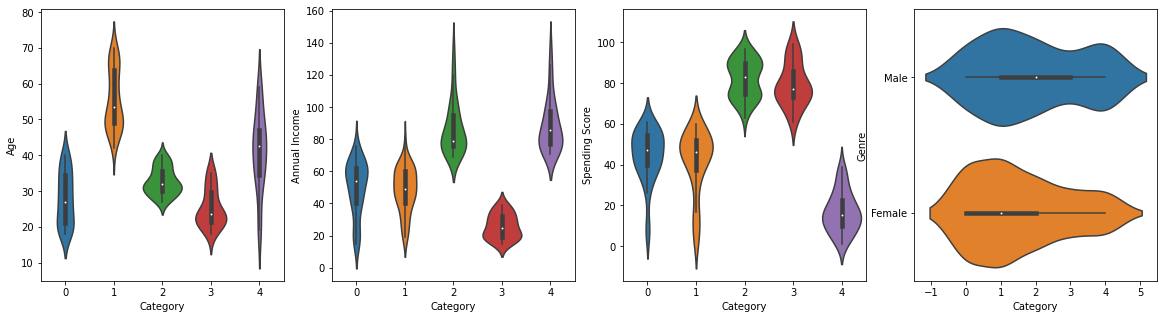

In [27]:
fig, axes = plt.subplots(1,4, figsize=(20,5))

sns.violinplot(x = 'Category', y = 'Age', data = df_ori,ax=axes[0])
sns.violinplot(x = 'Category', y = 'Annual Income', data = df_ori,ax=axes[1])
sns.violinplot(x = 'Category', y = 'Spending Score', data = df_ori,ax=axes[2])
sns.violinplot(x = 'Category', y = 'Genre', data = df_ori,ax=axes[3])
plt.show()

In [28]:
df_ori[['Age', 'Annual Income', 'Spending Score','Category']].groupby('Category').mean()

,Age,Annual Income,Spending Score
Category,,,
0,27.957447,50.000000,44.638298
1,55.551724,48.482759,41.775862
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,41.264706,88.500000,16.764706


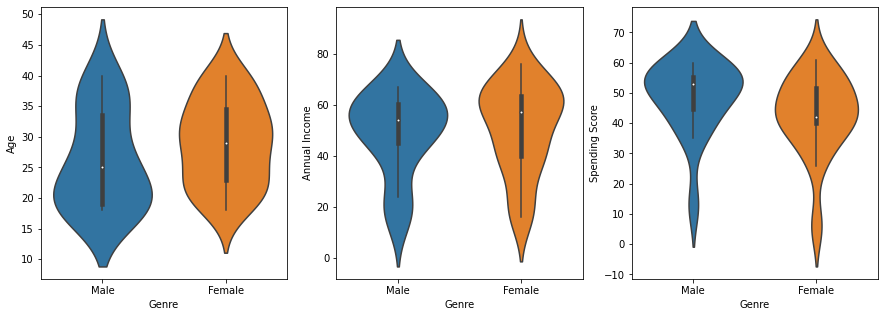

In [30]:
group_1= df_ori[df_ori['Category']==0]
group_1.head()

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.violinplot(x = 'Genre', y = 'Age', data = group_1,ax=axes[0])
sns.violinplot(x = 'Genre', y = 'Annual Income', data = group_1,ax=axes[1])
sns.violinplot(x = 'Genre', y = 'Spending Score', data = group_1,ax=axes[2])

plt.show()

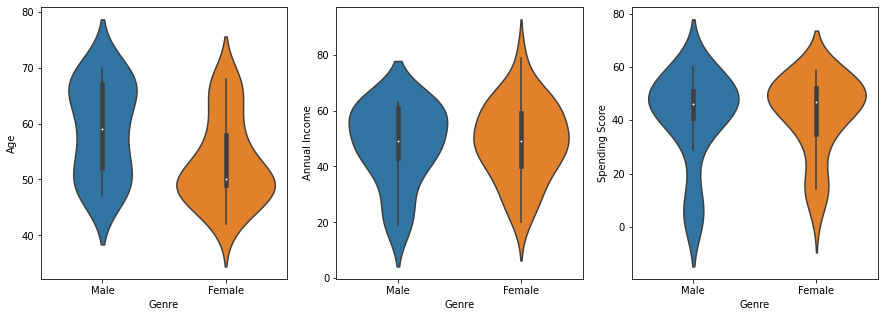

In [31]:
group_2= df_ori[df_ori['Category']==1]

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.violinplot(x = 'Genre', y = 'Age', data = group_2,ax=axes[0])
sns.violinplot(x = 'Genre', y = 'Annual Income', data = group_2,ax=axes[1])
sns.violinplot(x = 'Genre', y = 'Spending Score', data = group_2,ax=axes[2])

plt.show()

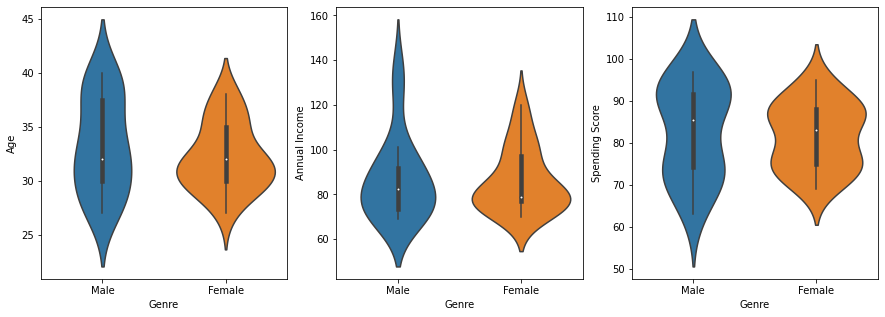

In [32]:
group_3= df_ori[df_ori['Category']==2]

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.violinplot(x = 'Genre', y = 'Age', data = group_3,ax=axes[0])
sns.violinplot(x = 'Genre', y = 'Annual Income', data = group_3,ax=axes[1])
sns.violinplot(x = 'Genre', y = 'Spending Score', data = group_3,ax=axes[2])

plt.show()

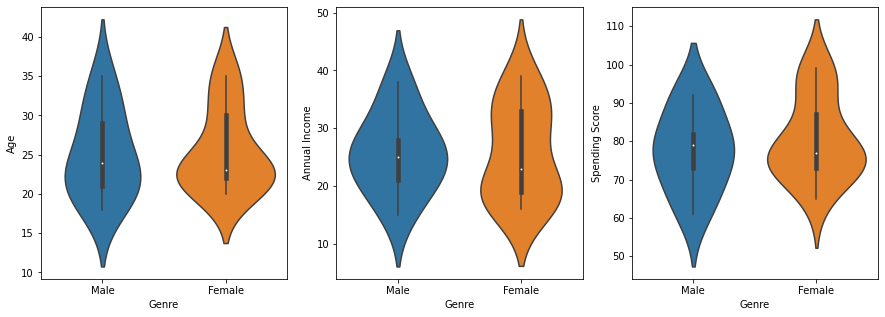

In [33]:
group_4= df_ori[df_ori['Category']==3]

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.violinplot(x = 'Genre', y = 'Age', data = group_4,ax=axes[0])
sns.violinplot(x = 'Genre', y = 'Annual Income', data = group_4,ax=axes[1])
sns.violinplot(x = 'Genre', y = 'Spending Score', data = group_4,ax=axes[2])

plt.show()

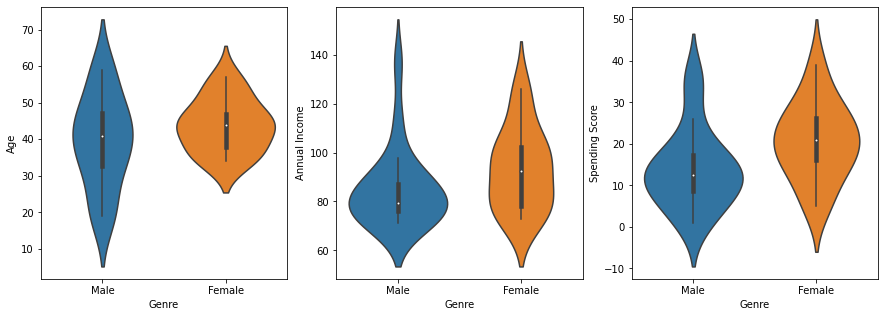

In [34]:
group_5= df_ori[df_ori['Category']==4]

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.violinplot(x = 'Genre', y = 'Age', data = group_5,ax=axes[0])
sns.violinplot(x = 'Genre', y = 'Annual Income', data = group_5,ax=axes[1])
sns.violinplot(x = 'Genre', y = 'Spending Score', data = group_5,ax=axes[2])

plt.show()

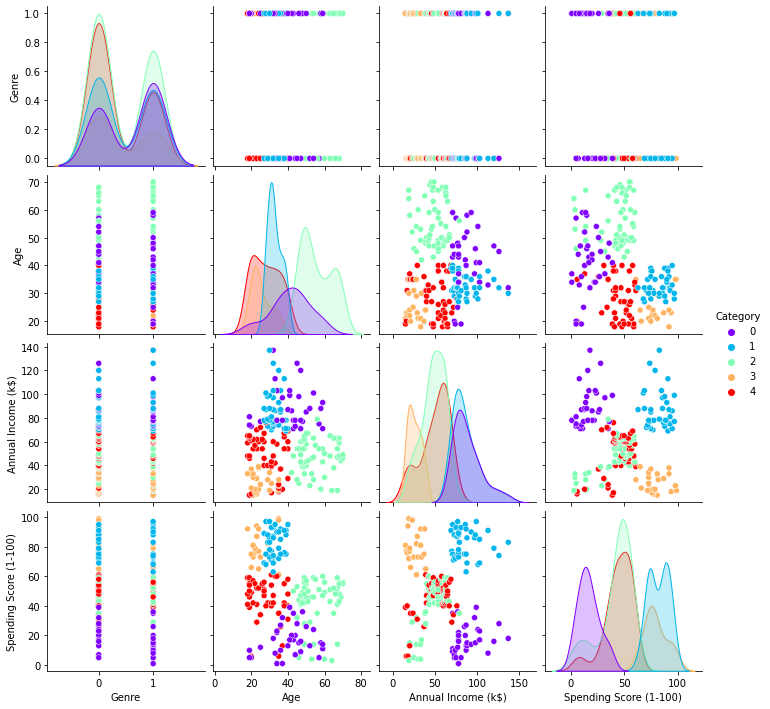

In [35]:
df.drop('Genre', axis = 1)
km = KMeans(n_clusters=5).fit(df)
#membaca kembali original data ke variabel lain
mall_ori = pd.read_csv('Mall_Customers.csv')
mall_ori.drop('CustomerID', axis = 1, inplace =True)
mall_ori['Genre'] = labeler.fit_transform(mall_ori['Genre'])
#membuat satu kolom category untuk menampung hasil kluster kita
mall_ori['Category']= km.labels_
sns.pairplot(data = mall_ori, hue = 'Category', palette = 'rainbow')